In [1]:
import rasterio
import numpy as np

In [ ]:
#Charge modis_stack_50

modis_stack_50=[]
years=range(1992,2021)
for i in years: 
    with rasterio.open(f'landcover_50m/landcover_{i}.tif') as src:
        modis_stack_50.append(src.read())
        nodata = src.nodata  # Obtener el valor nodata si está definido
        if nodata is not None:
            modis_stack_50[years.index(i)] = np.where(modis_stack_50[years.index(i)] == nodata, 0, modis_stack_50[years.index(i)])

       # length()
print(modis_stack_50[years.index(i)].shape)

In [ ]:
#Change the labels
from utilities import change_label
for i in range(len(years)):
    print(i)
    modis_stack_50[i]=change_label(modis_stack_50[i])

In [ ]:
#Save the position of the illogical transitions
modis_stack=modis_stack_50

illogical_positions=[]
illogical_changes=[]
for a in range(len(years)-1):
        for i in range(modis_stack[0].shape[1]):
            for j in range(modis_stack[0].shape[2]):
                if modis_stack[a][0,i,j]==1 and modis_stack[a+1][0,i,j]==4:
                    print("In the position ("+str(i)+","+str(j)+"), it has changed from forest to waterbody")
                    illogical_positions.append([years[a],i,j])
                elif modis_stack[a][0,i,j]==2 and modis_stack[a+1][0,i,j]==4:
                    print("In the position ("+str(i)+","+str(j)+"), it has changed from grassland to waterbody")
                    illogical_positions.append([years[a],i,j])
                elif modis_stack[a][0,i,j]==3 and modis_stack[a+1][0,i,j]==4:
                    print("In the position ("+str(i)+","+str(j)+"), it has changed from cropland to waterbody")
                    illogical_positions.append([years[a],i,j])
                elif modis_stack[a][0,i,j]==4 and modis_stack[a+1][0,i,j]==1:
                    print("In the position ("+str(i)+","+str(j)+"), it has changed from waterbody to forest")
                    illogical_positions.append([years[a],i,j])
                elif modis_stack[a][0,i,j]==5 and modis_stack[a+1][0,i,j]==1:
                    print("In the position ("+str(i)+","+str(j)+"), it has changed from built-up to forest")
                    illogical_positions.append([years[a],i,j])
print(illogical_positions)
print(illogical_changes)

In [ ]:
#Change in modis_stack_50, where there is an illogical position, the new value it will be 200
nueva_illogical=[]
for i in range(len(illogical_positions)):
    if illogical_positions[i][0]>=2010:
        nueva_illogical.append(illogical_positions[i])
        modis_stack_50[years.index(illogical_positions[i][0])][0,illogical_positions[i][1],illogical_positions[i][2]]=200


In [ ]:
#Save all this data in .tif files
for i in range(len(years)):
    with rasterio.open(f'illogical_transitions/landcover_{i}.tif', 'w', **profile) as dst:
        dst.write(modis_stack_50[i].astype(rasterio.float32))

In [2]:
#Change again the .tif files
years=range(1992,2021)
modis_stack_illogical=[]
for i in range(len(years)): 
        with rasterio.open(f'illogical_transitions/landcover_{i}.tif') as src:
                modis_stack_illogical.append(src.read())
                nodata = src.nodata  # Obtener el valor nodata si está definido
                if nodata is not None:
                        modis_stack_illogical[i] = np.where(modis_stack_illogical[i] == nodata, 0, modis_stack_illogical[i])

       # length()
        print(modis_stack_illogical[i].shape)

(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)


(array([50719766.,        0.,  3150495.,        0., 22062806.,        0.,
        49964458.,        0.,  3015181.,   556686.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

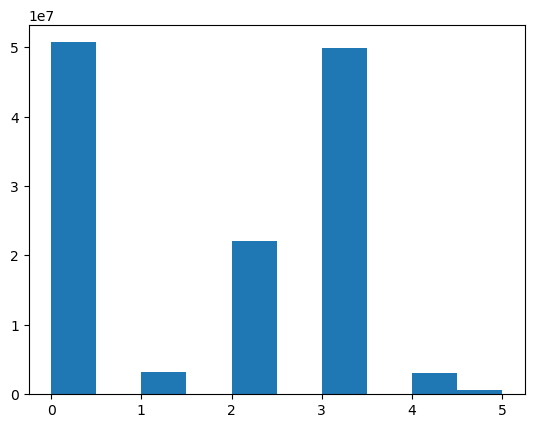

In [46]:
import matplotlib.pyplot as plt


data_flat = modis_stack_illogical[2].flatten()
plt.hist(data_flat)

In [14]:
#Save the positions and the years of the illogical positions
#Problem, we only have saved the illogical positions, but not the type, we will save the type now

illogical_positions=[]
for a in range(18,28):
    for i in range(9672):
        for j in range(13386):
            if modis_stack_illogical[a][0,i,j]==200:
                illogical_positions.append([years[a],i,j])

In [18]:
#Save again the files with the landcover, but without saving the illogical positions
years=range(2010,2021)
modis_stack_50_2=[]
for i in years: 
        with rasterio.open(f'landcover_50m/landcover_{i}.tif') as src:
                modis_stack_50_2.append(src.read())
                nodata = src.nodata  # Obtener el valor nodata si está definido
                if nodata is not None:
                        modis_stack_50_2[years.index(i)] = np.where(modis_stack_50_2[years.index(i)] == nodata, 0, modis_stack_50_2[years.index(i)])

       # length()
        print(modis_stack_50_2[years.index(i)].shape)

(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)


In [19]:
#Change the label
from utilities import change_label
for i in range(len(years)):
    print(i)
    modis_stack_50_2[i]=change_label(modis_stack_50_2[i])

0
37
1
37
2
37
3
37
4
37
5
37
6
37
7
37
8
37
9
37
10
37


In [22]:
ilpo=illogical_positions

In [27]:
years=range(2010,2021)

In [28]:
#Save the kind of illogical transition
for i in range(len(ilpo)):
        if modis_stack_50_2[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==1 and modis_stack_50_2[years.index(ilpo[i][0])+1][0,ilpo[i][1],ilpo[i][2]]==4:
                modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]=201
        if modis_stack_50_2[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==3 and modis_stack_50_2[years.index(ilpo[i][0])+1][0,ilpo[i][1],ilpo[i][2]]==4:
                modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]=202
        if modis_stack_50_2[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==2 and modis_stack_50_2[years.index(ilpo[i][0])+1][0,ilpo[i][1],ilpo[i][2]]==4:
                modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]=203
        if modis_stack_50_2[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==4 and modis_stack_50_2[years.index(ilpo[i][0])+1][0,ilpo[i][1],ilpo[i][2]]==1:
                modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]=204
        if modis_stack_50_2[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==5 and modis_stack_50_2[years.index(ilpo[i][0])+1][0,ilpo[i][1],ilpo[i][2]]==1:
                modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]=205


In [29]:
etiqueta=["Forest","Cropland","Grassland","Waterbody","Built-Up"]

In [59]:
cambio=[[0 for m in range(len(etiqueta))] for k in range(5)]

In [31]:
#Save the official data, in order to be able to compare it
years2=[2010,2015,2020]
modis_stack_senegal=[]
for i in years2: 
        with rasterio.open(f'senegal_data/official_data_cambiada_{i}.tif') as src:
                modis_stack_senegal.append(src.read())
                nodata = src.nodata  # Obtener el valor nodata si está definido
                if nodata is not None:
                        modis_stack_senegal[years2.index(i)] = np.where(modis_stack_senegal[years2.index(i)] == nodata, 0, modis_stack_senegal[years2.index(i)])

       # length()
        print(modis_stack_senegal[years2.index(i)].shape)

(1, 9672, 13386)
(1, 9672, 13386)
(1, 9672, 13386)


In [57]:
#Change the number that are 5 to 4, there is no sense to be 5
for a in years2:
    print(a)
    for i in range(9672):
        for j in range(13386):
            if modis_stack_senegal[years2.index(a)][0,i,j]==5:
                modis_stack_senegal[years2.index(a)][0,i,j]=4

2010
2015
2020


In [60]:
#Start to do the histogram
for a in years:
    if a in [2010,2011,2012,2013]:
        a2=2010
    if a in [2014,2015,2016,2017]:
        a2=2015
    if a in [2018,2019,2020]:
        a2=2020
    for i in range(len(ilpo)):
        if modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==201:
            cambio[0][modis_stack_senegal[years2.index(a2)][0,ilpo[i][1],ilpo[i][2]]]+=1
        if modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==202:
            cambio[1][modis_stack_senegal[years2.index(a2)][0,ilpo[i][1],ilpo[i][2]]]+=1
        if modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==203:
            cambio[2][modis_stack_senegal[years2.index(a2)][0,ilpo[i][1],ilpo[i][2]]]+=1
        if modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==204:
            cambio[3][modis_stack_senegal[years2.index(a2)][0,ilpo[i][1],ilpo[i][2]]]+=1
        if modis_stack_illogical[years.index(ilpo[i][0])][0,ilpo[i][1],ilpo[i][2]]==205:
            cambio[4][modis_stack_senegal[years2.index(a2)][0,ilpo[i][1],ilpo[i][2]]]+=1

In [56]:
modis_stack_senegal[years2.index(a2)][0,ilpo[i][1],ilpo[i][2]]

5

In [61]:
etiqueta3=["Forest to Waterbody","Grassland to Waterbody", "Cropland to Waterbody", "Waterbody to Forest", "Built-up to Forest"]

In [62]:
etiqueta_short=["Forest", "Crop", "Grass", "Water", "Built"]

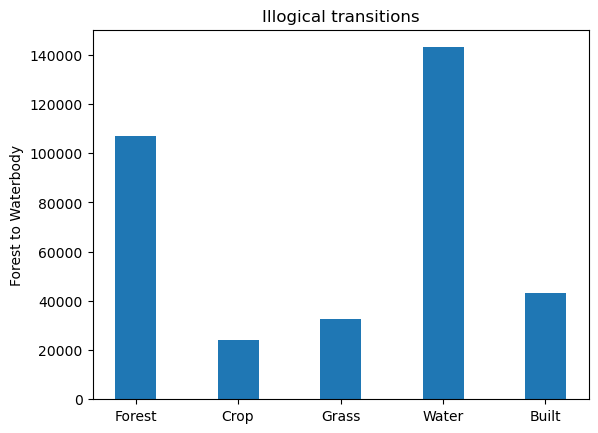

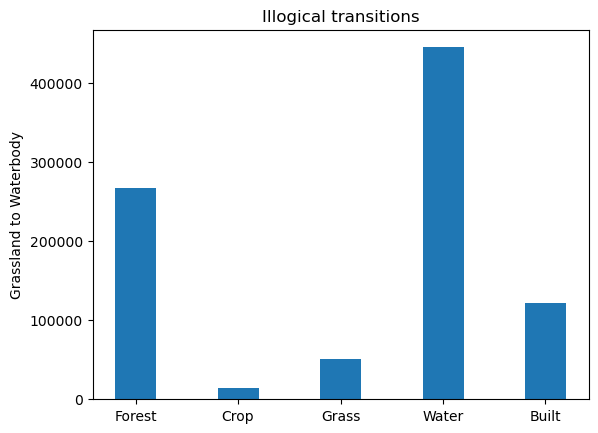

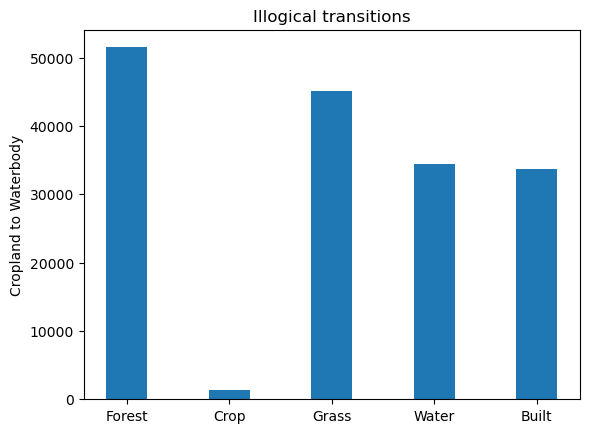

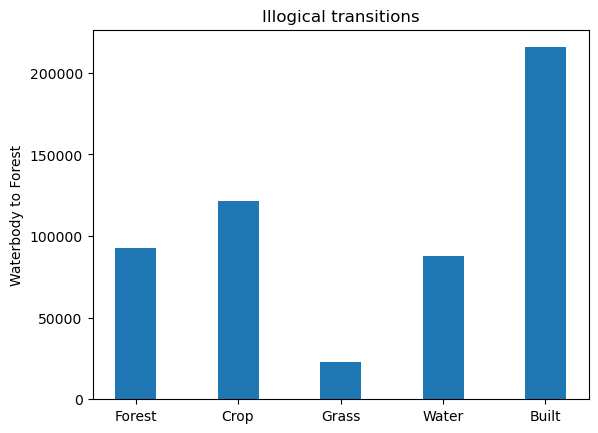

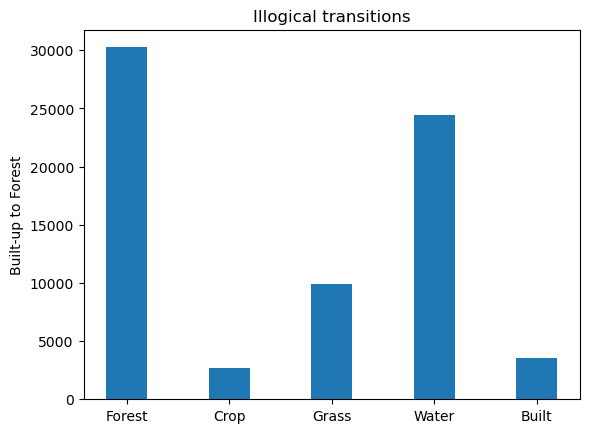

In [63]:
#Show the histogram
X_axis = np.arange(len(etiqueta)) 
for i in range(5):
        plt.bar(X_axis, cambio[i], width = 0.4, label="Have gone", tick_label=etiqueta_short)
        #plt.xlabel(etiqueta)
        plt.ylabel(etiqueta3[i])
        plt.title("Illogical transitions")

        plt.show()